<a href="https://colab.research.google.com/github/abhishekmanglaa/planet-moon-analysis-python/blob/main/planet_moon_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Planet-Moon Data

In [20]:
#importing the libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Part (1) Importing the data

In [21]:
#Reading the datasets, the table is the 6th table in the list hence we select the 6th using [5]
moonDF = (pd.read_html('https://en.wikipedia.org/wiki/List_of_natural_satellites#List.html', 
                   header = 0)
      [5])

In [22]:
#Lets look at the dataframe
moonDF.head()

,Image,Parent,Numeral,Name,Mean radius (km),Semi-major axis (km),Sidereal period (d) (r = retrograde),Discovery year,Discovered by,Notes,Ref(s)
0,NaN,Earth,I (1),Moon,1737.1,384399,27.321582,Prehistoric,—,Synchronous rotation,[12]
1,NaN,Mars,I (1),Phobos,11.1±0.15,9380,0.319,1877,Hall,NaN,[13][14][15]
2,NaN,Mars,II (2),Deimos,6.2±0.18,23460,1.262,1877,Hall,NaN,[13][14][15]
3,NaN,Jupiter,I (1),Io,"1,818.1±0.1",421800,1.769,1610,Galileo,Main-group moon (Galilean),[15][16]
4,NaN,Jupiter,II (2),Europa,1560.7±0.7,671100,3.551,1610,Galileo,Main-group moon (Galilean),[15][16]


## Part 2 (a) Renaming the columns for easy understanding

In [23]:
#Renaming the columns
(moonDF.rename(columns = {'Image': 'image', 
                          'Parent': 'planet', 
                          'Numeral': 'number', 
                          'Mean radius (km)': 'avg_radius', 
                          'Semi-major axis (km)': 'sm_axis', 
                          'Sidereal period (d) (r = retrograde)': 'revolution_time', 
                          'Discovery year': 'discovery_year', 
                          'Discovered by': 'discovered_by', 
                          'Notes': 'notes', 
                          'Ref(s)': 'references', 
                          'Name': 'moon'}, 
               inplace = True))

In [24]:
#Let's look at the DF
moonDF.head()

,image,planet,number,moon,avg_radius,sm_axis,revolution_time,discovery_year,discovered_by,notes,references
0,NaN,Earth,I (1),Moon,1737.1,384399,27.321582,Prehistoric,—,Synchronous rotation,[12]
1,NaN,Mars,I (1),Phobos,11.1±0.15,9380,0.319,1877,Hall,NaN,[13][14][15]
2,NaN,Mars,II (2),Deimos,6.2±0.18,23460,1.262,1877,Hall,NaN,[13][14][15]
3,NaN,Jupiter,I (1),Io,"1,818.1±0.1",421800,1.769,1610,Galileo,Main-group moon (Galilean),[15][16]
4,NaN,Jupiter,II (2),Europa,1560.7±0.7,671100,3.551,1610,Galileo,Main-group moon (Galilean),[15][16]


## Part 2 (b) Reordering the columns for better understanding

In [25]:
#Reordering the column for better understanding
moonDF = (moonDF[['planet', 'moon', 'number', 'discovery_year', 'discovered_by',
                  'avg_radius', 'sm_axis', 'revolution_time', 'notes', 
                  'references', 'image']])

In [26]:
#Let's look at the data again
moonDF.head()

,planet,moon,number,discovery_year,discovered_by,avg_radius,sm_axis,revolution_time,notes,references,image
0,Earth,Moon,I (1),Prehistoric,—,1737.1,384399,27.321582,Synchronous rotation,[12],NaN
1,Mars,Phobos,I (1),1877,Hall,11.1±0.15,9380,0.319,NaN,[13][14][15],NaN
2,Mars,Deimos,II (2),1877,Hall,6.2±0.18,23460,1.262,NaN,[13][14][15],NaN
3,Jupiter,Io,I (1),1610,Galileo,"1,818.1±0.1",421800,1.769,Main-group moon (Galilean),[15][16],NaN
4,Jupiter,Europa,II (2),1610,Galileo,1560.7±0.7,671100,3.551,Main-group moon (Galilean),[15][16],NaN


## Part 2 (c) Setting the column 'planet' and 'moon' to form a two level index

In [27]:
#Setting the index as planet and then the moon
(moonDF.set_index(['planet', 'moon'], inplace = True))

In [28]:
#Let's look at the dataframe
moonDF.head()

number discovery_year  ...    references image
planet  moon                           ...                    
Earth   Moon     I (1)    Prehistoric  ...          [12]   NaN
Mars    Phobos   I (1)           1877  ...  [13][14][15]   NaN
        Deimos  II (2)           1877  ...  [13][14][15]   NaN
Jupiter Io       I (1)           1610  ...      [15][16]   NaN
        Europa  II (2)           1610  ...      [15][16]   NaN

[5 rows x 9 columns]

In [29]:
#Removing the image column because it has none values
moonDF.drop(columns = ['image'], inplace = True)

## Part 2 (d) Functions to clean the columns

In [30]:
#For this function we first need to remove the ',' from the string and then extraxt the first floating number in the string
def cleanNumericData(s):
  num = str(s).replace(',', '')
  return float(re.search(r'\d*\.\d+|\d+', num).group())


#Function to clean the references column to make it a list of numeric referenes
def cleanReferences(s):
  splitted = str(s).split('][')
  splittedClear = [str(item).replace('[','').replace(']','') for item in splitted]
  return splittedClear


#Function to clean the numeral (Now called number column to just show the numeric count the moon, remove the roman value)
def cleanNumberColumn(s):
  return s[s.find("(")+1:s.find(")")]

In [31]:
#Applying the function to avg_radius, revolution_time and sm_axis column to get just the main floating point number
moonDF.avg_radius = moonDF.avg_radius.apply(cleanNumericData)
moonDF['sm_axis'] = moonDF.sm_axis.apply(cleanNumericData)
moonDF['revolution_time'] = moonDF.revolution_time.apply(cleanNumericData)

#Applying the function to the references column
moonDF['references'] = moonDF.references.apply(cleanReferences)

#Applying the function to the cleanNumberColumn to the number column
moonDF['number'] = moonDF.number.apply(cleanNumberColumn)

In [32]:
#Let's look at the dataframe
moonDF.head()

number discovery_year  ...                       notes    references
planet  moon                          ...                                          
Earth   Moon        1    Prehistoric  ...        Synchronous rotation          [12]
Mars    Phobos      1           1877  ...                         NaN  [13, 14, 15]
        Deimos      2           1877  ...                         NaN  [13, 14, 15]
Jupiter Io          1           1610  ...  Main-group moon (Galilean)      [15, 16]
        Europa      2           1610  ...  Main-group moon (Galilean)      [15, 16]

[5 rows x 8 columns]

## Part (3) 
### I'm trying to answer the question that what is the average radius of the revolution orbit of the moons, grouped by planets?

In [33]:
#What is the average radius of the moon per planet for the top 5 avg radii.
avgMoonDF = moonDF.reset_index().groupby(by = ['planet']).mean().sort_values(by = ['sm_axis'], ascending = False).head(5)
avgMoonDF

,avg_radius,sm_axis,revolution_time
planet,,,
Jupiter,112.664557,1.899521e+07,571.688873
Saturn,78.400366,1.408357e+07,742.173494
Neptune,158.378571,1.165578e+07,1915.823514
Uranus,132.422222,4.134024e+06,458.386704
Earth,1737.100000,3.843990e+05,27.321582


Text(0, 0.5, 'Avg Radii in KM (10^7)')

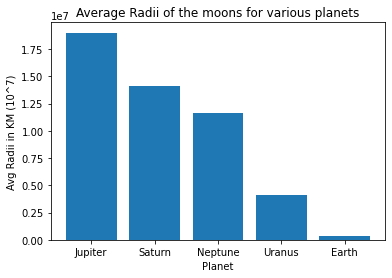

In [34]:
plt.bar(avgMoonDF.index, avgMoonDF.sm_axis)
plt.title('Average Radii of the moons for various planets')
plt.xlabel('Planet')
plt.ylabel('Avg Radii in KM (10^7)')

### As we can see that Jupiter has the highest average radii of the moons orbit, which makes sense because Jupiter is the biggest planet in the solar system.